In [2]:
%matplotlib inline

import os
import numpy as np
import healpy as hp
import pylab as plt
import cv2

import deepstring as ds

n_gaussian = 10
gmu = 0.5

def func(dt):
    return canny(dt,0,'none','sch')

def filt_all(maps,func):
    out1 = []
    for m in maps:
        out1.append(func(m))
        
#     return np.stack([maps,np.array(out1)],axis=3)
    return np.array(out1)

In [4]:
strings = ['../data/maps/string/map1n_allz_rtaapixlw_2048_'+str(i+1)+'.fits' for i in range(3)]
dp_string = ds.Data_Provider(strings,dtype = np.float32,coef=0.5)

gaussians = ['../data/maps/gaussian/'+str(i)+'.fits' for i in range(n_gaussian)]
dp_gaussian = ds.Data_Provider(gaussians,dtype = np.float32)

def dp_total(n):
    l = 200
    string = dp_string(n,l)
    gaussian = dp_gaussian(n,l)
    
    y = filt_all(string,func).reshape(n,l,l,1)
    x = (0.7*gaussian+string).reshape(n,l,l,1)
    
    return x,y

conv = ds.ConvolutionalLayers(nx=200,ny=200,learning_rate = 0.001,n_channel=1,restore=1,
                        model_add='./model',arch_file_name='arch')

In [10]:
conv.train(data_provider=dp_total,training_epochs = 200,n_s = 10, dropout=0.7, time_limit=None, verbose=1)

Epoch:0, cost= 3693889.750000
Epoch:1, cost= 2590527.450000
Epoch:2, cost= 2570984.650000
Epoch:3, cost= 2734960.725000
Epoch:4, cost= 2686040.375000
Epoch:5, cost= 2650356.725000
Epoch:6, cost= 2706887.875000
Epoch:7, cost= 2578081.675000
Epoch:8, cost= 2601804.175000
Epoch:9, cost= 2612862.350000
Epoch:10, cost= 2389802.525000
Epoch:11, cost= 2567678.925000
Epoch:12, cost= 2472702.275000
Epoch:13, cost= 2464683.825000
Epoch:14, cost= 2423724.300000
Epoch:15, cost= 2380774.450000
Epoch:16, cost= 2430223.900000
Epoch:17, cost= 2366661.375000
Epoch:18, cost= 2425411.975000
Epoch:19, cost= 2372281.125000
Epoch:20, cost= 2393299.975000
Epoch:21, cost= 2276990.000000
Epoch:22, cost= 2333964.062500
Epoch:23, cost= 2277126.925000
Epoch:24, cost= 2304805.650000
Epoch:25, cost= 2304627.875000
Epoch:26, cost= 2192370.275000
Epoch:27, cost= 2233528.037500
Epoch:28, cost= 2221944.800000
Epoch:29, cost= 2148785.925000
Epoch:30, cost= 2262170.062500
Epoch:31, cost= 2141277.362500
Epoch:32, cost= 21

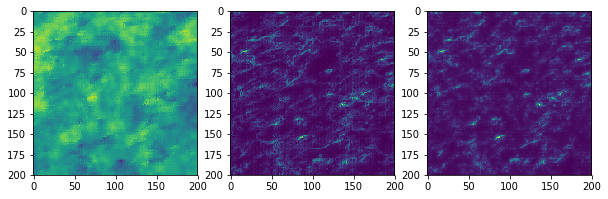

In [13]:
# gs,s = dp_total(1)
# s_pred = conv.conv(gs)

# fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(10,5))

# ax1.imshow(gs[0,:,:,0])
# ax2.imshow(s[0,:,:,0])
# ax3.imshow(s_pred)